# Unsupervised Learning Examples
## 1. Principal Component Analysis
## 2. K-Means Clustering

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.datasets.samples_generator import make_blobs

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

data_dir = "C:/Users/jhtchns2/Box/ACE 592 SAE Spring 2022/Class Examples/4_Analysis/"

C:\Users\jhtchns2\.conda\envs\ace592\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. PCA Examples

### 1a. Face Detection

An example from the Python Data Science Handbook

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=10)
print(faces.target_names)
print(faces.images.shape)

['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Andy Roddick' 'Ann Veneman' 'Ari Fleischer' 'Ariel Sharon'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Bill McBride' 'Bill Simon'
 'Colin Powell' 'Condoleezza Rice' 'David Beckham' 'David Nalbandian'
 'Dick Cheney' 'Donald Rumsfeld' 'Edmund Stoiber' 'Fidel Castro'
 'George HW Bush' 'George Robertson' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gordon Brown' 'Hamid Karzai' 'Hans Blix'
 'Harrison Ford' 'Hillary Clinton' 'Hu Jintao' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'James Kelly' 'Jean Chretien'
 'Jeb Bush' 'Jennifer Aniston' 'Jennifer Capriati' 'John Ashcroft'
 'John Bolton' 'John Howard' 'Joschka Fischer' 'Juan Carlos Ferrero'
 'Julianne Moore' 'Junichiro Koizumi' 'Kofi Annan' 'Lance Armstrong'
 'Laura Bush' 'Lindsay Davenport' 'Lleyton Hewitt' 'Megawati Sukarnoputri'
 'Michael Bloomberg' 'Michael Schumacher' 'Mohammad Khatami'
 'Nicole Kidman' 'Pervez Musharraf' 

How can we break these faces down to their most basic components?

In [3]:
faces.data.shape

(3032, 2914)

So we have 3k rows, and a bunch of columns for the pixels.

Text(0.5, 1.0, 'Portion of Variance Explained')

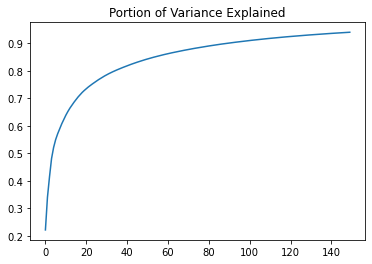

In [4]:
K = 150

pca_model = PCA(K)

pca_model = pca_model.fit(faces.data)

plt.plot(list(range(K)),pca_model.explained_variance_ratio_.cumsum())
plt.title("Portion of Variance Explained")

__How does this inform us about choice of K?__

(0.0, 100000.0)

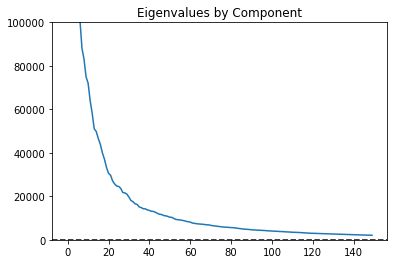

In [5]:
plt.plot(list(range(K)),pca_model.explained_variance_)
plt.axhline(1,ls="--",color="black")
plt.title("Eigenvalues by Component")
plt.ylim(0,10**5)

__What does this tell us?__

In the case of images, the PCA components can actually be visualized:

In [6]:
pca_model.components_[1]

array([-0.01791684, -0.01784921, -0.01816854, ...,  0.03527019,
        0.03330606,  0.03101374], dtype=float32)

These are the coordinates for the plane going through the data. Since each entry is a pixel value, we can reconstruct into an image.

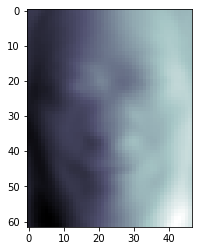

In [7]:
plt.imshow(pca_model.components_[1].reshape(62,47),cmap="bone")

__Why does it look like this you wonder?__

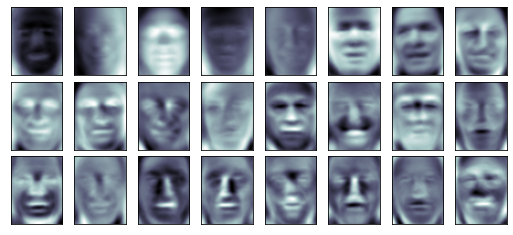

In [8]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_model.components_[i].reshape(62, 47), cmap='bone')

What are these? The are referred to as __"eigenfaces"__

Let's try reconstructing the data

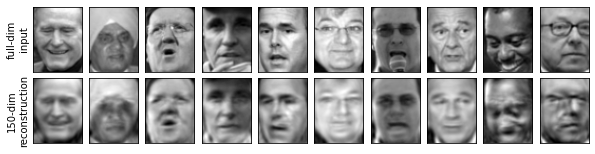

In [10]:
components = pca_model.transform(faces.data)
projected = pca_model.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

So just from 150 components we can make a fairly accurate representation of the faces!

### 1b. Making an Asset Index

Here we will demonstrate making an asset index using an Ethiopia LSMS survery round from 2011. The Living Standard Management Survey (LSMS) is a World Bank used for collecting household-level data.

In [11]:
df = pd.read_csv(data_dir+"asset_data.csv")

df

household_id        ea_id  rural           pw  saq01  saq02  saq03  \
0        1010101601002   1010101601      1  2236.134521      1      1      1   
1        1010101601002   1010101601      1  2236.134521      1      1      1   
2        1010101601002   1010101601      1  2236.134521      1      1      1   
3        1010101601002   1010101601      1  2236.134521      1      1      1   
4        1010101601002   1010101601      1  2236.134521      1      1      1   
...                ...          ...    ...          ...    ...    ...    ...   
138910  15010203102121  15010203102      1   202.670288     15      1      2   
138911  15010203102121  15010203102      1   202.670288     15      1      2   
138912  15010203102121  15010203102      1   202.670288     15      1      2   
138913  15010203102121  15010203102      1   202.670288     15      1      2   
138914  15010203102121  15010203102      1   202.670288     15      1      2   

        saq04  saq05  saq06  saq07  saq08  hh_s10q00             hh_s10q0a  \
0           8     88     16      1      2          1        Kerosene stove   
1           8     88     16      1      2          2     Butance Gas stove   
2           8     88     16      1      2          3        Electric stove   
3           8     88     16      1      2          4          Blanket/Gabi   
4           8     88     16      1      2          5   Mattress and/or bed   
...       ...    ...    ...    ...    ...        ...                   ...   
138910      8     88     31      2    121         31           Axe (Gejera   
138911      8     88     31      2    121         32       Pick Axe (Geso)   
138912      8     88     31      2    121         33  Plough (Traditional)   
138913      8     88     31      2    121         34       Plough (Modern)   
138914      8     88     31      2    121         35            Water pump   

        hh_s10q01  hh_s10q02_a  hh_s10q02_b  
0             2.0          1.0          2.0  
1             0.0          NaN          NaN  
2             0.0          NaN          NaN  
3             0.0          NaN          NaN  
4             3.0          1.0          2.0  
...           ...          ...          ...  
138910        0.0          NaN          NaN  
138911        0.0          NaN          NaN  
138912        0.0          NaN          NaN  
138913        0.0          NaN          NaN  
138914        0.0          NaN          NaN  

[138915 rows x 17 columns]

Data is in long format. Here I will convert to "wide"

In [12]:
assets = df.set_index(['household_id',"ea_id","hh_s10q0a"])["hh_s10q01"]

assets = assets.unstack()
assets

hh_s10q0a                   Axe (Gejera  Bicycle  Biogas stove (pit)  \
household_id   ea_id                                                   
1010101601002  1010101601           1.0      0.0                 0.0   
1010101601017  1010101601           0.0      0.0                 0.0   
1010101601034  1010101601           0.0      0.0                 0.0   
1010101601049  1010101601           0.0      0.0                 0.0   
1010101601064  1010101601           1.0      0.0                 0.0   
...                                 ...      ...                 ...   
15010203102072 15010203102          0.0      0.0                 0.0   
15010203102087 15010203102          1.0      0.0                 0.0   
15010203102099 15010203102          0.0      0.0                 0.0   
15010203102109 15010203102          0.0      0.0                 0.0   
15010203102121 15010203102          0.0      0.0                 0.0   

hh_s10q0a                   Blanket/Gabi  Butance Gas stove  \
household_id   ea_id                                          
1010101601002  1010101601            0.0                0.0   
1010101601017  1010101601            0.0                0.0   
1010101601034  1010101601            0.0                0.0   
1010101601049  1010101601            0.0                0.0   
1010101601064  1010101601            2.0                0.0   
...                                  ...                ...   
15010203102072 15010203102           0.0                0.0   
15010203102087 15010203102           5.0                0.0   
15010203102099 15010203102           2.0                0.0   
15010203102109 15010203102           2.0                0.0   
15010203102121 15010203102           2.0                0.0   

hh_s10q0a                   CD/VCD/DVD/Video Deck  Cart (Animal Drawn  \
household_id   ea_id                                                    
1010101601002  1010101601                     0.0                 0.0   
1010101601017  1010101601                     0.0                 0.0   
1010101601034  1010101601                     0.0                 0.0   
1010101601049  1010101601                     0.0                 0.0   
1010101601064  1010101601                     0.0                 0.0   
...                                           ...                 ...   
15010203102072 15010203102                    0.0                 0.0   
15010203102087 15010203102                    0.0                 0.0   
15010203102099 15010203102                    0.0                 0.0   
15010203102109 15010203102                    0.0                 0.0   
15010203102121 15010203102                    0.0                 0.0   

hh_s10q0a                   Cart (Hand pushed)  Electric stove  \
household_id   ea_id                                             
1010101601002  1010101601                  0.0             0.0   
1010101601017  1010101601                  0.0             0.0   
1010101601034  1010101601                  0.0             0.0   
1010101601049  1010101601                  0.0             0.0   
1010101601064  1010101601                  0.0             0.0   
...                                        ...             ...   
15010203102072 15010203102                 0.0             0.0   
15010203102087 15010203102                 1.0             0.0   
15010203102099 15010203102                 0.0             0.0   
15010203102109 15010203102                 0.0             0.0   
15010203102121 15010203102                 0.0             0.0   

hh_s10q0a                   Fixed line telephone  ...  Sewing machine  \
household_id   ea_id                              ...                   
1010101601002  1010101601                    0.0  ...             0.0   
1010101601017  1010101601                    0.0  ...             0.0   
1010101601034  1010101601                    0.0  ...             0.0   
1010101601049  1010101601                    0.0  ...             0.0

To make this "asset index" we can apply PCA to this long list of household assets.

#### Very Important: Always standardize data before using PCA.

In [13]:
assets_std = (assets - assets.mean())/assets.std()


Let's try fitting a model with 3 components.

In [14]:
pca_model = PCA(n_components=3)

pca_model = pca_model.fit(assets_std.fillna(0))

pca_model.transform(assets_std.fillna(0))

array([[ 1.02087442,  2.27135492,  2.09051583],
       [-0.99696621,  0.0883764 ,  1.5700881 ],
       [-0.59263516, -1.70428043, -0.41178483],
       ...,
       [-0.55353906, -1.57043301, -0.74297708],
       [-1.06501862, -1.89873594, -0.28667993],
       [-1.06501862, -1.89873594, -0.28667993]])

So now we have created a 3-d coordinate system out of the several asset variables we have.

How are these components related to our asset measurements?

In [15]:
pca_model.explained_variance_ratio_

array([0.34687576, 0.07889105, 0.06602763])

So the first component explains 34% while the next two explain about 8 to 7%. Let's try more components:

In [16]:
K = 20
pca_model = PCA(n_components=K)
pca_model = pca_model.fit(assets_std.fillna(0))

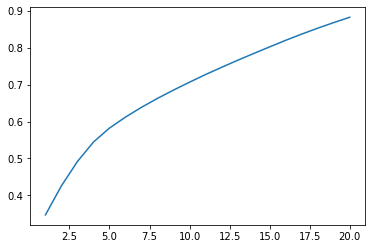

In [17]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,K+1)),pca_model.explained_variance_ratio_.cumsum())

__What does this rule seem to say?__

Let's look at the eigenvalue rule:

In [18]:
pca_model.explained_variance_

array([12.14038922,  2.76112709,  2.31091697,  1.84605459,  1.32391036,
        1.04466684,  0.92961893,  0.84578835,  0.78823162,  0.74969579,
        0.72470341,  0.6830158 ,  0.66994194,  0.64177824,  0.62908921,
        0.62334127,  0.5889705 ,  0.56244159,  0.52970533,  0.50738153])

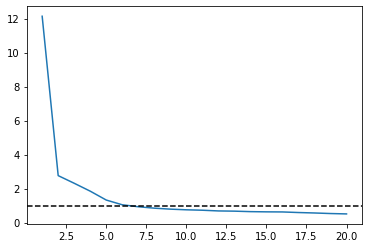

In [19]:
plt.plot(list(range(1,K+1)),pca_model.explained_variance_)
plt.axhline(1,ls="--",color='black')

__So this rule seems to point to what?__

In [20]:
K = 6
pca_model = PCA(n_components=K)
pca_model = pca_model.fit(assets_std.fillna(0))

Now let's look at how it correlates with the variables.

In [21]:
load_scores = pd.DataFrame(pca_model.components_)
load_scores

0         1         2         3         4         5         6   \
0  0.025774  0.219597  0.225090  0.029967  0.197703  0.230394  0.228354   
1  0.155079 -0.052275 -0.065133  0.398122 -0.063707  0.013299 -0.080728   
2  0.106568 -0.048450  0.208776 -0.120441  0.044032 -0.198910  0.010553   
3  0.077148  0.218003 -0.186292 -0.087844 -0.001424  0.122443  0.259195   
4  0.601446  0.003608  0.032812 -0.208427 -0.028277 -0.063407 -0.024888   
5 -0.057475 -0.007084 -0.063241 -0.021013 -0.090915  0.055067 -0.008257   

         7         8         9   ...        25        26        27        28  \
0  0.224661  0.208746  0.197394  ...  0.231250  0.146718 -0.002959  0.183581   
1 -0.073736 -0.065688 -0.009937  ... -0.077060  0.130540  0.365975 -0.036488   
2 -0.016602  0.071701 -0.094979  ...  0.011378 -0.075448  0.296133 -0.067462   
3  0.223865 -0.005737  0.120223  ...  0.243307 -0.264022  0.177526  0.149947   
4  0.002139 -0.052802 -0.044609  ... -0.037974 -0.039224 -0.167579 -0.047104   
5 -0.022847 -0.102428  0.036185  ... -0.020970 -0.071891  0.186267  0.027253   

         29        30        31        32        33        34  
0  0.219671  0.166052  0.159982  0.183652  0.110318  0.088104  
1  0.034663  0.035228 -0.028376 -0.015668 -0.047004  0.218933  
2 -0.245408  0.098125  0.136072  0.187167  0.146543 -0.157237  
3  0.089816 -0.227892 -0.115454 -0.174953 -0.165796  0.006665  
4 -0.054136  0.049450  0.121005  0.035998 -0.018876  0.200528  
5  0.046776 -0.138708  0.377724 -0.030652 -0.069393 -0.019031  

[6 rows x 35 columns]

In [22]:
pca_model.explained_variance_ratio_

array([0.34687576, 0.07889083, 0.0660273 , 0.0527447 , 0.03781197,
       0.02964276])

In [23]:
load_scores.columns = assets.columns

In [24]:
load_scores.T.sort_values(2,ascending=False)

0         1         2         3  \
hh_s10q0a                                                               
Mofer and Kember               0.009479  0.355650  0.341226  0.172126   
Plough (Traditional)           0.018817  0.342849  0.334162  0.207483   
Sickle (Machid)               -0.002959  0.365975  0.296133  0.177526   
Biogas stove (pit)             0.225090 -0.065133  0.208776 -0.186292   
Private car                    0.222370 -0.061180  0.201791 -0.201577   
Water storage pit              0.183652 -0.015668  0.187167 -0.174953   
Plough (Modern)                0.078180  0.068256  0.174094 -0.032472   
Mitad - electric               0.234217 -0.054969  0.159770 -0.213621   
Weaving equipment              0.110318 -0.047004  0.146543 -0.165796   
Pick Axe (Geso)                0.023373  0.160344  0.144676  0.125423   
Water pump                     0.159982 -0.028376  0.136072 -0.115454   
Axe (Gejera                    0.025774  0.155079  0.106568  0.077148   
Wardrobe                       0.166052  0.035228  0.098125 -0.227892   
Refrigerator                   0.223143 -0.028915  0.089568 -0.214785   
Electric stove                 0.208746 -0.065688  0.071701 -0.005737   
Butance Gas stove              0.197703 -0.063707  0.044032 -0.001424   
Motorcycle                     0.245941 -0.097986  0.018937  0.251061   
Mitad - power saving (modern)  0.155276  0.034052  0.016602 -0.268600   
Sewing machine                 0.231250 -0.077060  0.011378  0.243307   
Cart (Animal Drawn             0.228354 -0.080728  0.010553  0.259195   
Cart (Hand pushed)             0.224661 -0.073736 -0.016602  0.223865   
Bicycle                        0.219597 -0.052275 -0.048450  0.218003   
Sofa set                       0.183581 -0.036488 -0.067462  0.149947   
Shelf for storing goods        0.146718  0.130540 -0.075448 -0.264022   
Kerosene stove                 0.142498  0.032774 -0.082152 -0.118025   
Fixed line telephone           0.197394 -0.009937 -0.094979  0.120223   
Blanket/Gabi                   0.029967  0.398122 -0.120441 -0.087844   
Satelite Dish                  0.243427 -0.014024 -0.138522  0.151266   
Wrist wastch/clock             0.088104  0.218933 -0.157237  0.006665   
Radio                          0.106432  0.242670 -0.179460 -0.000804   
CD/VCD/DVD/Video Deck          0.230394  0.013299 -0.198910  0.122443   
Jewels (Gold and Silver)       0.067810  0.260750 -0.227230 -0.178723   
Mattress and/or bed            0.065481  0.344401 -0.234345 -0.116982   
Television                     0.219671  0.034663 -0.245408  0.089816   
Mobile Telephone               0.113368  0.196123 -0.292484 -0.058877   

                                      4         5  
hh_s10q0a                                          
Mofer and Kember              -0.217962 -0.106984  
Plough (Traditional)          -0.147819 -0.197241  
Sickle (Machid)               -0.167579  0.186267  
Biogas stove (pit)             0.032812 -0.063241  
Private car                    0.033122 -0.041494  
Water storage pit              0.035998 -0.030652  
Plough (Modern)                0.066807  0.809092  
Mitad - electric               0.015105 -0.045345  
Weaving equipment             -0.018876 -0.069393  
Pick Axe (Geso)                0.536208 -0.137495  
Water pump                     0.121005  0.377724  
Axe (Gejera                    0.601446 -0.057475  
Wardrobe                       0.049450 -0.138708  
Refrigerator                   0.019489 -0.028101  
Electric stove                -0.052802 -0.102428  
Butance Gas stove             -0.028277 -0.090915  
Motorcycle                    -0.027985 -0.012387  
Mitad - power saving (modern) -0.124243 -0.063124  
Sewing machine                -0.037974 -0.020970  
Cart (Animal Drawn            -0.024888 -0.008257  
Cart (Hand pushed)             0.002139 -0.022847  
Bicycle                        0.003608 -0.007084  
Sofa set                      -0.047104  0.027253  
Shelf for storing goods       -0.039

So how might we try and interpret these components?

Here is a class I wrote to interace with the model easier.

In [25]:
class PCA_Model:
    def __init__(self,ncomps,data,cols):
        
        self.ncomps = ncomps
        self.cols = cols
        self.data = data
        self.scaled_data = StandardScaler().fit_transform(data[cols].values)
        
    def fit(self):
        self.PCA_obj = PCA(self.ncomps).fit(self.scaled_data)
    
    def describe(self):
        explvar_ = self.PCA_obj.explained_variance_ratio_

        explvar = pd.DataFrame(explvar_[np.newaxis,:]*100,\
                               columns=["Component " + str(x) for x in range(self.ncomps)],\
                               index=["% Explained Variance"])
        
        loadscores_ = self.PCA_obj.components_
        loadscores = pd.DataFrame(loadscores_,\
                                  columns=self.cols,\
                                  index=["Component " + str(x) for x in range(self.ncomps)])
        print("Explains {0:0.2f}% of the variance".format(round(sum(explvar_),2)*100))
        print(explvar)
        print(loadscores)
        return explvar,loadscores
    
    def gen_data(self):
        return self.PCA_obj.transform(self.scaled_data)
    
    def graph(self,alpha=.6):
        self.graphdata = pd.concat([self.data[[color]].reset_index(drop=True),\
                                    pd.DataFrame(self.gen_data()).reset_index(drop=True)],axis=1)
        if self.ncomps==2:
            return self.graphdata.plot(kind="scatter",x=0,y=1,\
                                       c=color,alpha=alpha,colormap=cm)
        else:
            ax = plt.axes(projection='3d')
            ax.scatter3D(self.graphdata[0], \
                         self.graphdata[1], \
                         self.graphdata[2])#, \
                         #c=color,colormap=cm)
    

In [26]:
pca4 = PCA_Model(4,assets.fillna(0),assets.columns)
pca4.fit()
var,load_scores = pca4.describe();

Explains 54.00% of the variance
                      Component 0  Component 1  Component 2  Component 3
% Explained Variance    34.686671      7.89022     6.602015      5.27435
hh_s10q0a    Axe (Gejera   Bicycle  Biogas stove (pit)  Blanket/Gabi  \
Component 0     0.025776  0.219593            0.225092      0.029981   
Component 1     0.155153 -0.052378           -0.065082      0.398720   
Component 2     0.106352 -0.048179            0.208816     -0.120614   
Component 3     0.077621  0.218320           -0.186284     -0.087226   

hh_s10q0a    Butance Gas stove  CD/VCD/DVD/Video Deck  Cart (Animal Drawn  \
Component 0           0.197701               0.230391            0.228356   
Component 1          -0.063748               0.013098           -0.080602   
Component 2           0.043748              -0.198835            0.010471   
Component 3          -0.001541               0.122308            0.259558   

hh_s10q0a    Cart (Hand pushed)  Electric stove  Fixed line telephone  ... 

## 2. K-means Examples

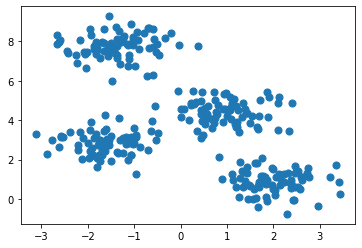

In [27]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

So let's see how K-means will find this rather obviously clustered data.


In [28]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

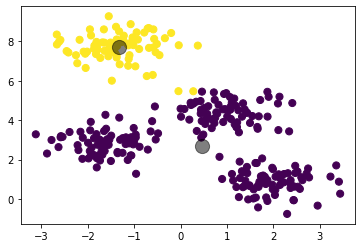

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

So 2 picks up one but not the others. Let's try again:

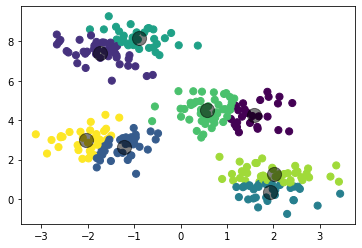

In [30]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

What would our Heuristics say?

In [31]:
class Kmeans_Model:
    def __init__(self,data,num_clusters):
        self.df = StandardScaler().fit_transform(data)
        self.K = num_clusters
        
    def fit(self):    
        self.model = KMeans(self.K).fit(self.df)
    
    def predict(self):
        self.prediction = self.model.predict(self.df)
        return self.prediction
    
    def sil_score(self):
        return silhouette_score(self.df,self.model.predict(self.df),sample_size=10000)
    
def score_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.sil_score()

def inertia_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.model.inertia_


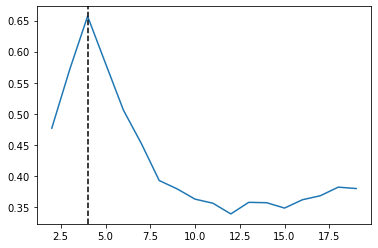

In [32]:
K=20

sil_scores =[score_by_k(X,i) for i in range(2,K)]
plt.plot(list(range(2,K)),sil_scores)
plt.axvline(4,color="black",ls="--")

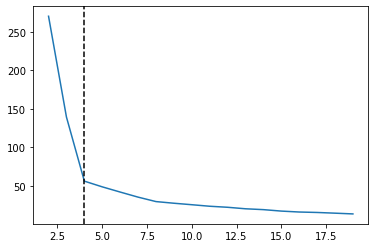

In [33]:
init_scores =[inertia_by_k(X,i) for i in range(2,K)]
plt.plot(list(range(2,K)),init_scores)
plt.axvline(4,color="black",ls="--")

Pretty clear what the optimum is.

Let's try a more connected dataset.

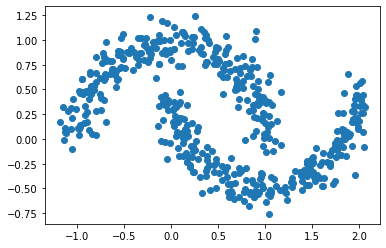

In [34]:
noisy_moons = datasets.make_moons(n_samples=500, noise=.1)

plt.scatter(noisy_moons[0][:,0],noisy_moons[0][:,1])

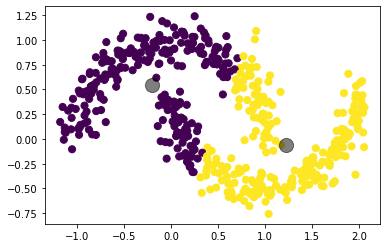

In [35]:
X2 = noisy_moons[0]

kmeans = KMeans(n_clusters=2)
kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Not so good. Let's look at heuristics.

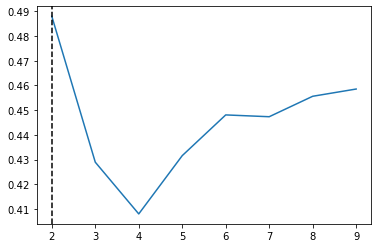

In [36]:
K = 10
sil_scores =[score_by_k(X2,i) for i in range(2,K)]
plt.plot(list(range(2,K)),sil_scores)
plt.axvline(2,color="black",ls="--")

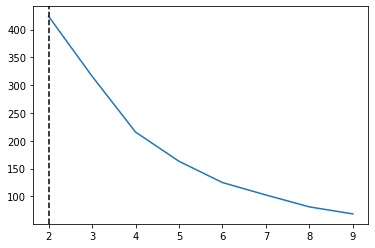

In [37]:
init_scores =[inertia_by_k(X2,i) for i in range(2,K)]
plt.plot(list(range(2,K)),init_scores)
plt.axvline(2,color="black",ls="--")

So in the case of this data, we would not be able to determine any optimal value.

### Consumption Clustering of Households

Going back to our LSMS example, let's look at how households spend their money across food, non-food items, and education.

In [38]:
df = pd.read_csv(data_dir+"consumption_data.csv")
df = df.dropna()
df = df.set_index("household_id")

df.head()

ea_id  saq01  rural           pw  adulteq  hh_size  \
household_id                                                             
1010101601002  1010101601      1      1  2236.134521     6.62        8   
1010101601017  1010101601      1      1  2236.134521     5.70        7   
1010101601034  1010101601      1      1  2236.134521     0.74        1   
1010101601049  1010101601      1      1  2236.134521     3.12        4   
1010101601064  1010101601      1      1  2236.134521     3.30        4   

               no_conv  no_cons  food_cons_ann  nonfood_cons_ann  \
household_id                                                       
1010101601002        0        0   10816.000488            4560.0   
1010101601017        0        0    8034.000488            4066.0   
1010101601034        0        0    2652.000000            1874.0   
1010101601049        0        0    8606.000000            2162.0   
1010101601064        0        0   14583.126367            3756.0   

               educ_cons_ann  total_cons_ann  price_index_hce  \
household_id                                                    
1010101601002           92.0       15468.000            1.034   
1010101601017            0.0       12100.000            1.034   
1010101601034            0.0        4526.000            1.034   
1010101601049           88.0       10856.000            1.034   
1010101601064          108.0       18447.125            1.034   

               nom_totcons_aeq  cons_quint  
household_id                                
1010101601002      2336.555908         2.0  
1010101601017      2122.807129         1.0  
1010101601034      6116.216309         4.0  
1010101601049      3479.487305         3.0  
1010101601064      5590.038086         4.0

In [39]:
cols_of_interest = ["nonfood_cons_ann","educ_cons_ann","food_cons_ann"]

In [40]:
px.scatter_3d(df,x=cols_of_interest[0],y=cols_of_interest[1],z=cols_of_interest[2])

In [41]:
cons = pd.DataFrame(df[cols_of_interest].values / df[['adulteq']].values)

cons.columns = cols_of_interest
cons.index = df.index
cons_std = (cons - cons.mean())/cons.std()

# Remove outlier
cons_std = cons_std[cons_std['nonfood_cons_ann']<50]

In [42]:
kmeans = KMeans(5)
kmeans = kmeans.fit(cons_std)
cons_std['cluster'] = kmeans.predict(cons_std)

In [43]:
px.scatter_3d(cons_std,x=cols_of_interest[0],y=cols_of_interest[1],z=cols_of_interest[2],color='cluster')

### What do you think?

In [44]:
class Kmeans_Model:
    def __init__(self,data,num_clusters):
        self.df = StandardScaler().fit_transform(data)
        self.K = num_clusters
        
    def fit(self):    
        self.model = KMeans(self.K).fit(self.df)
    
    def predict(self):
        self.prediction = self.model.predict(self.df)
        return self.prediction
    
    def sil_score(self):
        return silhouette_score(self.df,self.model.predict(self.df),sample_size=10000)
    
def score_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.sil_score()

def inertia_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.model.inertia_

In [45]:
cols_of_interest = ['nonfood_cons_ann','food_cons_ann',"educ_cons_ann"]

Let's look at some heuristics:

Text(0.5, 1.0, 'Silhouette Score')

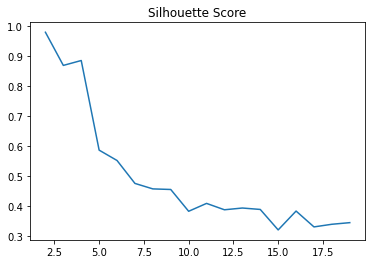

In [46]:
scores = [score_by_k(df[cols_of_interest],x) for x in range(2,20)]

import matplotlib.pyplot as plt
plt.plot(list(range(2,20)),scores)
plt.title("Silhouette Score")

Text(0.5, 1.0, 'Inertia Score')

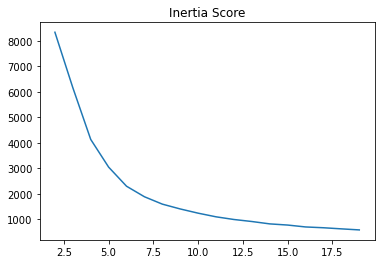

In [47]:
inertia_scores = [inertia_by_k(df[cols_of_interest],x) for x in range(2,20)]
plt.plot(list(range(2,20)),inertia_scores)
plt.title("Inertia Score")

In [51]:
K = 10

kmeans = KMeans(K)
kmeans = kmeans.fit(cons_std)
cons_std['cluster'] = kmeans.predict(cons_std)

px.scatter_3d(cons_std,x=cols_of_interest[0],y=cols_of_interest[1],z=cols_of_interest[2],color='cluster')